# 타이타닉 승객 데이터 분석
<br>

#### 타이타닉 승객들의 데이터를 분석하고, 승객들의 생존 여부를 예측하는 프로젝트

In [331]:
import pandas as pd
# 판다스 임포트


## 데이터 로드 및 분석

판다스를 이용하여 데이터를 로드하고 간단하게 분석해봄.

In [332]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
# 데이터셋 로드


In [333]:
train.head()
# 데이터가 잘 로드되었는지 확인해보기


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 데이터에 대한 간략한 설명

1. PassengerId : 승객 고유번호
2. Survived : 생존여부 (0 : 사망 / 1: 생존)
3. Pclass : 객실등급 (1: 가장좋은 객실 ~ 3 : 가장 안좋은 객식)
4. Name : 승객 이름
5. Sex : 승객 성별
6. Age : 승객 나이
7. SibSp : 타이타닉호에 같이 탑승한 가족/친척의 수 (0명 ~ n명)
8. Parch : 같이 탑승한 부모 혹은 자녀의 숫자 (0명 ~ n명)
9. Ticket : 티켓 고유번호
10. Fare : 운임 (비용)
11. Cabin : 선실번호 (Nan은 데이터없음)
12. Embarked : 승선위치 (C : 세르부르 / S : 사우스햄튼 / Q : 퀸즈타운)


In [334]:
test.head()
# 테스트 데이터셋 확인
# 이 승객들의 생존여부를 예측해야 하므로, 생존 여부가 빠져있음


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [335]:
print('트레이닝 데이터셋의 사이즈', train.shape)
print('테스트 데이터셋의 사이즈', test.shape)
# shape 확인해보기


트레이닝 데이터셋의 사이즈 (891, 12)
테스트 데이터셋의 사이즈 (418, 11)


In [336]:
train.info()
# 트레이닝 데이터셋 정보 확인
# 자세히 보면, Age(나이) 데이터와 Cabin(선실)데이터는 없는것도 다수있음.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [337]:
test.info()
# 테스트 데이터셋 정보확인
# 마찬가지로, Age(나이) 데이터와, Cabin(선실) 데이터는 일부 없음.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [338]:
train.isnull().sum()
# 트레이닝 데이터의 누락된 데이터 숫자


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [339]:
test.isnull().sum()
# 테스트 데이터의 누락된 데이터 숫자


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 시각화를 위한 라이브러리 임포트

matplotlib과 seaborn을 사용할 것임.

In [340]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [341]:
# bar 차트를 그려주는 함수 정의
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))



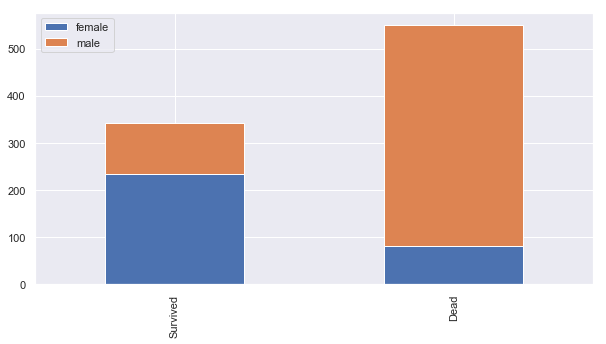

In [342]:
bar_chart('Sex')
# 성별이 죽었는지 살았는지에 대해 얼마나 영향을 미쳤는지 보여줌


여성 승객은 비교적 많이 생존한 것에 비해, 남성 승객은 높은비율로 사망한 것을 알 수 있음. <br>
당시 상황으로 여성들을 먼저 대피시켰을 수도 있다는 가설을 세울 수 있음.

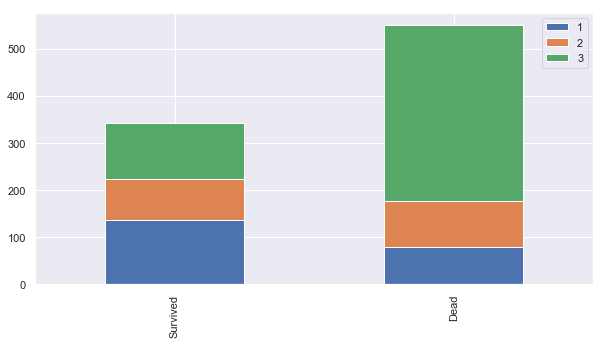

In [343]:
bar_chart('Pclass')
# 객실 등급에 따라 생존율을 나타냄


1등급 객실에 탑승했던 승객이 3등급 객실에 탑승했던 승객에 비해 높은 비율로 살아남았다는 것을 알 수 있음. <br>
역시 1등급 객실에 탑승한 승객들을 먼저 대피시켰을 수도 있다는 가설을 세울 수 있음.


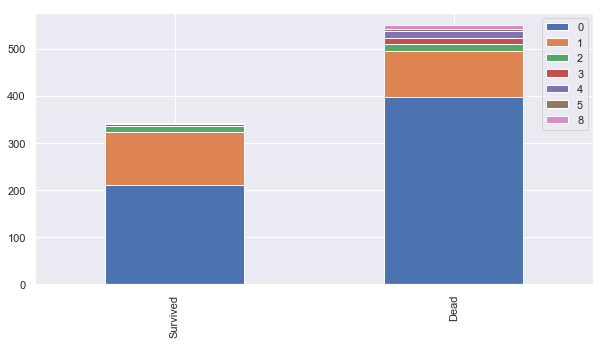

In [344]:
bar_chart('SibSp')
# 가족이나 친척의 숫자에 따른 생존율을 나타냄


크게 눈에 띌만한 유의미한 결과를 찾기 어려웠음. <br>
친척/가족 1명과 함께 탑승한 인원은 다른 인원에 비해 생존률이 아주 조금 높았고, <br>
3명 이상의 가족과 함께 탑승한 인원은 대부분 사망한 것을 알 수 있음.

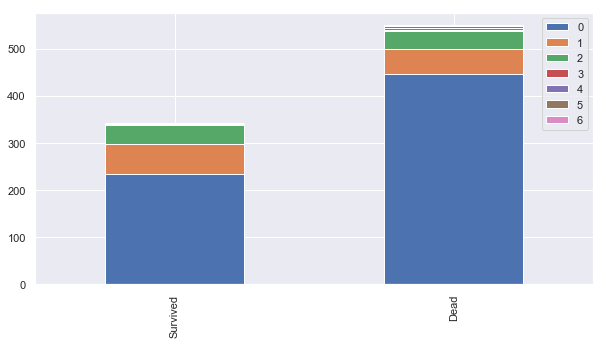

In [345]:
bar_chart('Parch')
# 부모 혹은 자녀와 함께 탑승했는지 여부에 따른 생존율을 나타냄


역시 유의미한 결과를 찾기 어려웠음. <br>
위와 마찬가지로 부모/자녀 1명과 함께 탑승한 인원은 생존율이 아주 약간 높았으나, 눈에 띌 정도는 아님. <br>
마찬가지로 3명 이상 함꼐 탑승한 승객들은 거의 대부분 사망하였음.

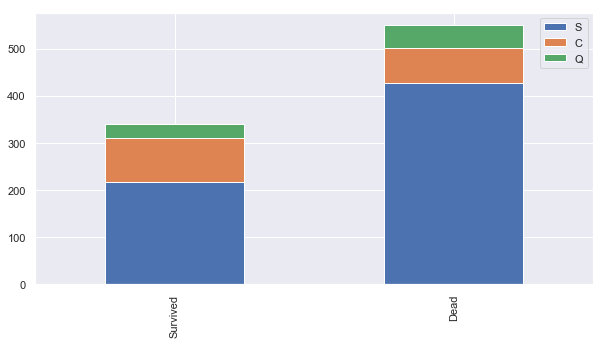

In [346]:
bar_chart('Embarked')
# 승선위치에 따른 생존률을 나타냄


마찬가지로 유의미한 결과를 찾기 어려움.

## Feature Engineering

데이터를 프리프로세싱하는 과정을 거침 <br>




1. 이름에 대한 정보는 승객의 생존여부에 영향이 있을거라고 생각되지 않음. <br>
그러나 이름중에 Mr. Mrs. 등은 중요한 단서가 될 수 있으니, 이러한 단어만 추출함.

In [347]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)  # 정규 표현식을 사용하여 문자를 추출

# 문자별로 잘라낸 것임.

In [348]:
train['Title'].value_counts()
# 가장 많이 등장한 단어 순으로 출력


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Mme           1
Jonkheer      1
Capt          1
Sir           1
Don           1
Countess      1
Ms            1
Name: Title, dtype: int64

In [349]:
test['Title'].value_counts()
# 가장 많이 등장한 단어 순으로 출력


Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [350]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona": 3, "Mme": 3, "Capt": 3, "Sir": 3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

# 가장 많이나온 미스터, 미스, 미세스는 0, 1, 2 로 맵핑하고,
# 기타 이름 타이틀은 3으로 맵핑 -> 새로운 컬럼으로 만듬



In [351]:
train.head()
# 새로운 타이틀 컬럼이 추가되었음을 확인


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [352]:
test.head()
# 새로운 타이틀 컬럼이 추가되었음을 확인


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


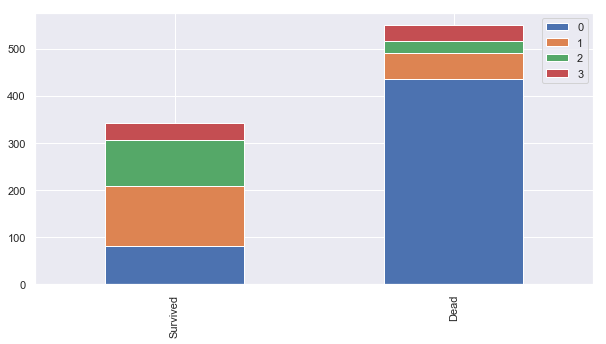

In [353]:
bar_chart('Title')
# 이름의 타이틀(미스터, 미세스, 미스 등)이 죽음에 얼마나 영향을 미쳤는지 출력


이름 타이틀에서 유의미한 결과를 찾아내었음. <br>
미스, 미세스등 여성들은 대부분 살 확률이 높았고, 미스터가 달린 남성들은 대부분 사망하였음 <br>
0 : 미스터 <br>
1 : 미스 <br>
2 : 미세스 <br>
3 : 기타 <br>

In [354]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
# 이름에서 필요한 정보만 추출했기 때문에 이름컬럼은 이제 제거함


컴퓨터는 영어를 알아볼수 없기 때문에 숫자로 맵핑시키는 작업들을 거침 <br>


In [355]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

# 남성은 0, 여성은 1로 맵핑시킴


나이 정보가 유실된(Nan) 승객들이 많기 때문에, 채워줘야함. <br>
아까 이름에서 얻어내었던 미스터, 미세스, 미스등의 정보를 활용함. <br>

만약 나이가 유실된 승객의 타이틀이 0(미스터)이라면 미스터들의 평균나이를 넣어줌 <br>
만약 나이가 유실된 승객의 타이틀이 1(미스)이라면 미스들의 평균나이를 넣어줌 <br>
만약 나이가 유실된 승객의 타이틀이 2(미세스)이라면 미세스들의 평균나이를 넣어줌 <br>
만약 나이가 유실된 승객의 타이틀이 3(기타)라면 기타들의 평균나이를 넣어줌 <br>


In [356]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [357]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
5      30.0
6      30.0
7       9.0
8      35.0
9      35.0
10     21.0
11     21.0
12     30.0
13     30.0
14     21.0
15     35.0
16      9.0
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.0
23     30.0
24     21.0
25     35.0
26     30.0
27     30.0
28     21.0
29     30.0
       ... 
861    30.0
862    35.0
863    21.0
864    30.0
865    35.0
866    21.0
867    30.0
868    30.0
869     9.0
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.0
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.0
883    30.0
884    30.0
885    35.0
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

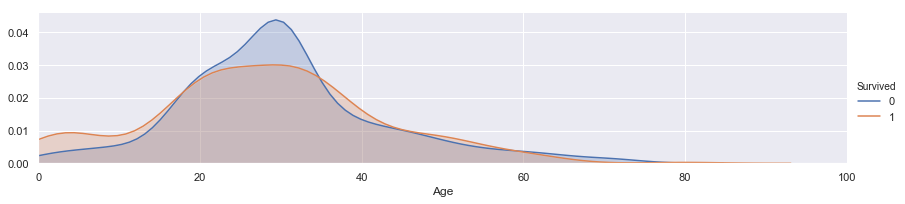

In [358]:
def age_chart(to, end):
    facet = sns.FacetGrid(train, hue="Survived", aspect=4)
    facet.map(sns.kdeplot, 'Age', shade=True)
    facet.set(xlim=(0, train['Age'].max()))
    facet.add_legend()
    plt.xlim(to, end)

# 나이에 따른 생존률을 그래프로 출력하는 함수를 만듬


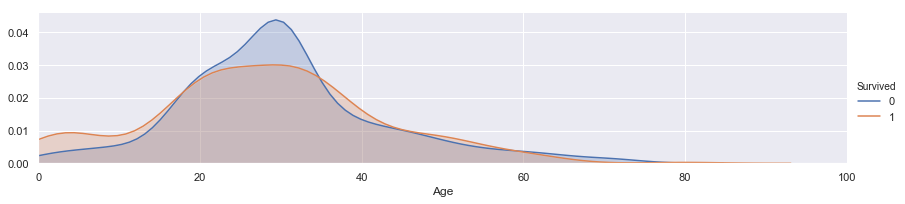

In [359]:
age_chart(0, 100)
# 전체 승객 출력

20세 이하의 어린 승객들은 생존률이 높았고, 25~30세 부근의 승객들은 생존률이 낮았음을 알 수 있음. <br>
당시에 어린이와 여성들을 먼저 구출하려는 시도가 있었음을 알 수 있음. <br>

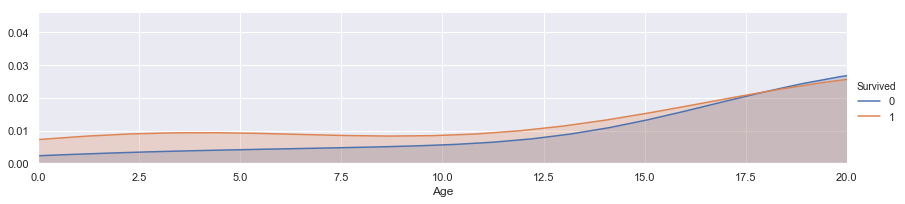

In [360]:
age_chart(0, 20)


17세 이상의 청년들은 생존율이 높지 않음. <br>
즉, 17세 이하의 승객들을 먼저 구조하려는 움직임이 있었다는 것을 알 수 있음.

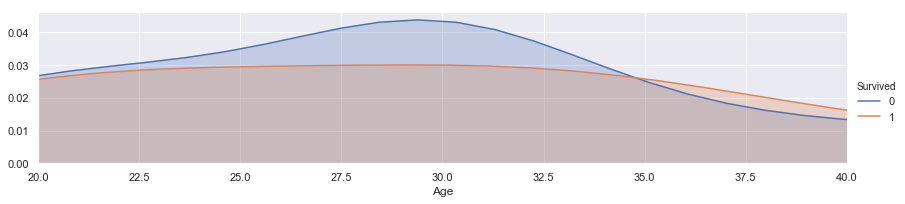

In [361]:
age_chart(20,40)

20대~30대 중반의 승객들은 유난히 사망률이 높은 것을 보아 <br>
이들은 어린 승객들을 구출하기 위해 희생하였다는 것을 알수있음. <br>

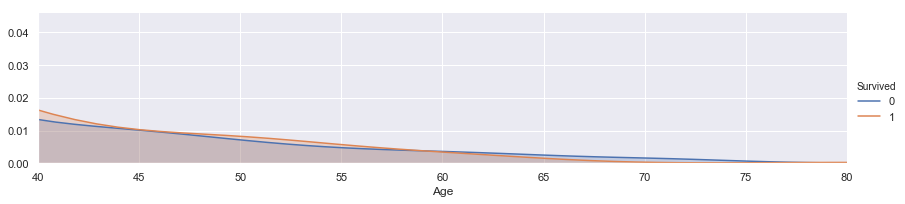

In [362]:
age_chart(40,80)

40대 이상의 승객들은 생존률과 사망률이 거의 비슷함을 알 수 있음.


In [363]:
train.info()
# 나이데이터가 모두 채워졌음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [364]:
train.info()
# 나이데이터가 모두 채워졌음.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


나이데이터를 Binning 함. <br>
Binning 이란 시퀀셜한 데이터를 그룹핑시키는것을 의미함 <br>
나이데이터를 그룹핑할것임.

In [365]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 17, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 17) & (dataset['Age'] <= 27), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4


In [366]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


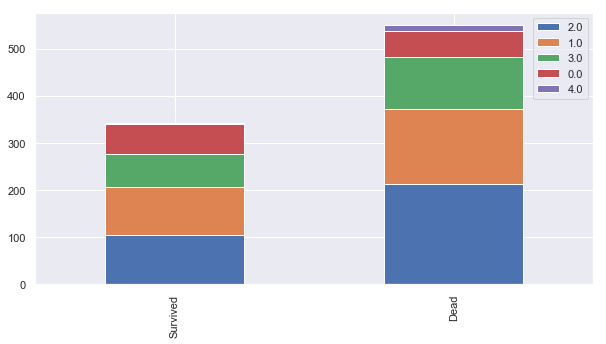

In [367]:
bar_chart('Age')

나이에 따른 사망률을 보여줌 <br>

Embarked 데이터 분석 <br>
승선위치에 따른 데이터 분석

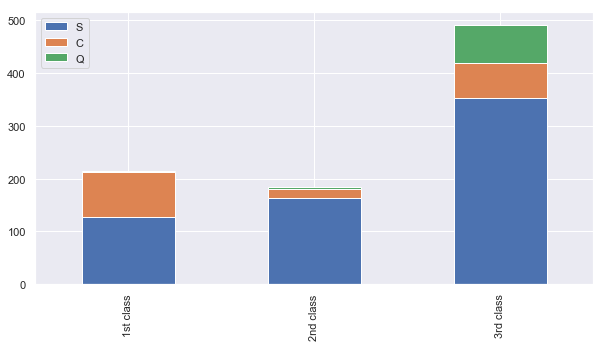

In [368]:

Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

분석결과 사우스햄튼에서 탑승한 승객이 제일 많았으며, <br>
셰르부르에서 탑승한 승객은 1등석에 많이 탑승한 것을 보아 셰르부르에서 탑승한 승객들은 더욱 부자일 것이고 <br>
퀸즈타운에서 탑승한 승객들은 거의 대부분 3등석이므로, 더욱 가난할 것이라고 가정할 수 있음.

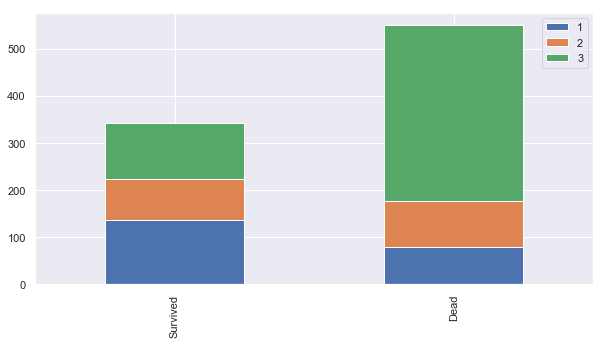

In [369]:
bar_chart('Pclass')

3등석에 탑승한 승객들은 대부분 죽었고, 1등석에 탑승한 승객은 대부분 살았으므로, <br>
퀸즈타운에서 탑승한 승객은 대부분 죽었고, 셰르부르에서 탑승한 승객은 그나마 높은 확률로 살아남았을수 있음. 

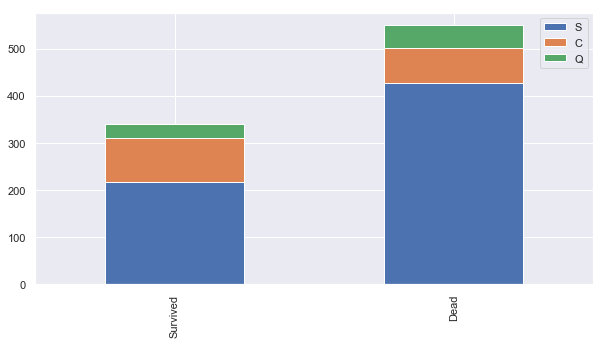

In [370]:
bar_chart('Embarked')

실제 Embarked 데이터를 보면 이와같은 사실을 파악할 수 있음.

2개의 Embark 데이터가 유실되었음으로 이것을 메꿔주어야함. <br>

In [371]:
nullEmbarkTrain = train['Embarked'].isnull()
nullEmbarkTest = test['Embarked'].isnull()

for i in zip(range(1, nullEmbarkTrain.size), nullEmbarkTrain):
    if i[1]: print('유실된 트레이닝 데이터: ', i)

for i in zip(range(1, nullEmbarkTest.size), nullEmbarkTest):
    if i[1]: print('유실된 테스트 데이터: ', i)


유실된 트레이닝 데이터:  (62, True)
유실된 트레이닝 데이터:  (830, True)


트레이닝 데이터의 62번 승객과 830번 승객의 데이터가 유실됨

In [372]:
nullEmbark = pd.concat([train[train['PassengerId'] == 62], train[train['PassengerId'] == 830]])
nullEmbark

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,1,3.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,1,3.0,0,0,113572,80.0,B28,NaN,2


모두 Pclass가 1이기 때문에, 1등석 승객들이다. <br>
Pclass 가 1인 승객은 절반은 사우스햄튼, 절반은 셰르부르에서 탑승했기 때문에 <br>
한명은 셰르부르, 한명은 사우스햄튼에서 탑승한 것으로 처리함.


In [373]:
train.loc[train['PassengerId'] == 62, 'Embarked'] = 'S',
train.loc[train['PassengerId'] == 830, 'Embarked'] = 'C',

In [374]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [375]:

embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

# 숫자로 변경해줌

In [376]:
test.info()
# Fare 정보 한개가 유실되었음.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
Title          418 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


In [384]:
nullFareTest = test['Fare'].isnull()

for i in zip(test['PassengerId'].values, nullFareTest):
    if i[1]: print(i)


(1044, True)


1044번 승객의 Fare 정보가 유실됨.